In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
import pack_ga
from IPython.display import HTML, display, clear_output
pack_cuda.USE_FLOAT32 = True
pack_cuda._ensure_initialized()


local
stop final relax at some point


{'seed': 0}
check
check
check
check


/mnt/d/packing/code/analysis/../core/pack_dynamics.py:59: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/../core/pack_dynamics.py:89: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


check
check
Generation 0, Trees 40, Best cost: 41.44873047, Est: 103.62182617, h: 0.100000


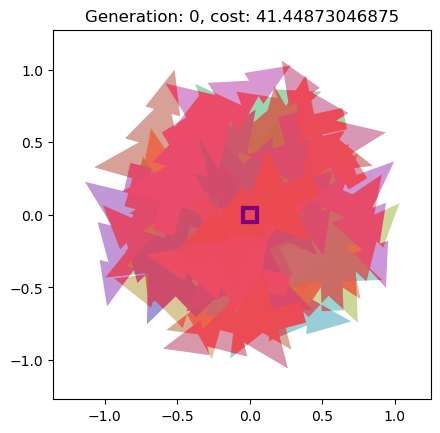

ERROR!
Traceback (most recent call last):
  File "/mnt/d/packing/code/analysis/../core/pack_runner.py", line 49, in run
    ga.run()
    ~~~~~~^^
  File "/home/jcottaar/miniconda3/envs/rapids-25.10/lib/python3.13/site-packages/decorator.py", line 235, in fun
    return caller(func, *(extras + args), **kw)
  File "/mnt/d/packing/code/analysis/../core/kaggle_support.py", line 154, in profile_each_line
    return func(*args, **kwargs)
  File "/mnt/d/packing/code/analysis/../core/pack_ga.py", line 743, in run
    assert(np.all(diversity[selected[:max_sel]]<1e-4))
           ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError



In [ ]:
import pack_runner
fastMode = False
runner = pack_runner.baseline_runner(fast_mode=True)
runner.base_ga.initializer.base_solution.use_fixed_h = True
runner.base_ga.initializer.base_solution.fixed_h = cp.array([0.1,0.,0.], dtype=kgs.dtype_cp)
runner.base_ga.initializer.jiggler.duration_init /=10000
runner.base_ga.initializer.jiggler.duration_compact /=10000
runner.base_ga.initializer.jiggler.duration_final/=10000
print(runner.base_ga.initializer.jiggler.n_rounds)
runner.base_ga.N_trees_to_do = np.array([40])
runner.base_ga.plot_fitness_predictors = True
runner.base_ga.plot_diversity_matrix = True
runner.base_ga.plot_champions = True
runner.n_generations = 300
kgs.profiling=False
runner.run()